In [1]:
import os
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyEclipseDVH import eclipse_DVH
from scipy import interpolate
from scipy import stats
from scipy.stats import wilcoxon  # must import explicitly

In [2]:
files = os.listdir()   # return a list of files
AAA_files = [file for file in files if file.endswith('AAA.txt')]
AXB_files = [file for file in files if file.endswith('AXB.txt')]

In [3]:
# d = {value: foo(value) for value in sequence if bar(value)}
AAA_dict = {file.strip('.txt'): eclipse_DVH(file) for file in AAA_files}    # load all AAA DVH into dict
AXB_dict = {file.strip('.txt'): eclipse_DVH(file) for file in AXB_files}    # load all AAA DVH into dict

Case11_AAA.txt loaded 	 patID = Case11_AAA	 Prescription [Gy] = 55.000
Case12_AAA.txt loaded 	 patID = Case12_AAA	 Prescription [Gy] = 55.000
Case13_AAA.txt loaded 	 patID = Case13_AAA	 Prescription [Gy] = 55.000
Case14_AAA.txt loaded 	 patID = Case14_AAA	 Prescription [Gy] = 55.000
Case16_AAA.txt loaded 	 patID = Case16_AAA	 Prescription [Gy] = 55.000
Case17_AAA.txt loaded 	 patID = Case17_AAA	 Prescription [Gy] = 55.000
Case1_AAA.txt loaded 	 patID = Case1_AAA	 Prescription [Gy] = 55.000
Case22_AAA.txt loaded 	 patID = Case22_AAA	 Prescription [Gy] = 55.000
Case24_AAA.txt loaded 	 patID = Case24_AAA	 Prescription [Gy] = 55.000
Case5_AAA.txt loaded 	 patID = Case5_AAA	 Prescription [Gy] = 55.000
Case11_AXB.txt loaded 	 patID = Case11_AXB	 Prescription [Gy] = 55.000
Case12_AXB.txt loaded 	 patID = Case12_AXB	 Prescription [Gy] = 55.000
Case13_AXB.txt loaded 	 patID = Case13_AXB	 Prescription [Gy] = 55.000
Case14_AXB.txt loaded 	 patID = Case14_AXB	 Prescription [Gy] = 55.000
Case16_AXB

In [4]:
case_list = AXB_dict.keys()
case_list = [entry.strip('_AXB') for entry in case_list]
case_list

['Case16',
 'Case24',
 'Case13',
 'Case12',
 'Case17',
 'Case5',
 'Case22',
 'Case11',
 'Case14',
 'Case1']

## Get data

This is the only cell to edit

In [5]:
structure = 'PTV CHEST'         # The structure to plot
#structure = 'ITV'

xlimits = [50,80]

In [6]:
for i, key in enumerate(case_list):
    temp_AAA_DVH_df = pd.DataFrame({key : AAA_dict.get(key + '_AAA').DVH_df[structure]})       # place in a df
    temp_AXB_DVH_df = pd.DataFrame({key : AXB_dict.get(key + '_AXB').DVH_df[structure] })       # place in a df

    if i == 0:
        AAA_df = temp_AAA_DVH_df  # create the dataframe
        AXB_df  = temp_AXB_DVH_df  # create the dataframe
    else:       
        AAA_df  = pd.concat([AAA_df, temp_AAA_DVH_df], axis=1)   # if df exists, populate    
        AXB_df  = pd.concat([AXB_df, temp_AXB_DVH_df], axis=1)   # if df exists, populate
    
    AAA_df = AAA_df.fillna(value=0)
    AXB_df = AXB_df.fillna(value=0)

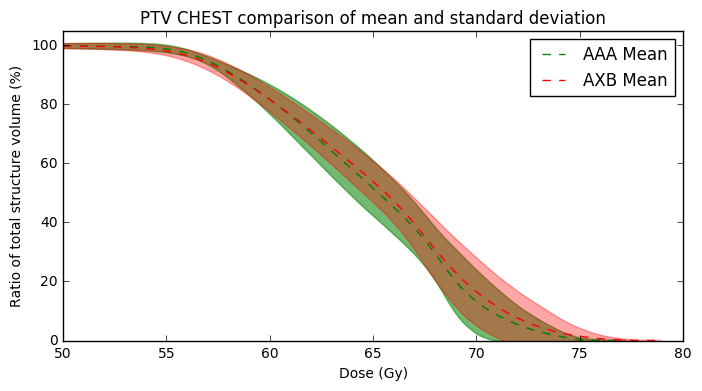

In [7]:
height=4
width=8           # wwidth of figs
plt.figure(figsize=(width, height))
    
plt.fill_between(AAA_df.mean(axis = 1).index.values, (AAA_df.mean(axis = 1) - AAA_df.std(axis = 1)).values, (AAA_df.mean(axis = 1) + AAA_df.std(axis = 1)).values, color = 'g', alpha=0.55, interpolate=True)
plt.plot(AAA_df.mean(axis = 1), ls = '--', color = 'g', label = 'AAA Mean')

plt.fill_between(AXB_df.mean(axis = 1).index.values, (AXB_df.mean(axis = 1) - AXB_df.std(axis = 1)).values, (AXB_df.mean(axis = 1) + AXB_df.std(axis = 1)).values, color = 'r', alpha=0.35, interpolate=True)
plt.plot(AXB_df.mean(axis = 1), ls = '--', color = 'r', label = 'AXB Mean')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend()
plt.ylim([0,105])
plt.xlim(xlimits)
plt.title(structure + ' comparison of mean and standard deviation')
plt.xlabel('Dose (Gy)')
plt.ylabel('Ratio of total structure volume (%)')